Training with sigmoid activation function...
  Method: batch gradient descent


d:\ANACONDA\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 - 1s - 1s/step - accuracy: 0.0903 - loss: 2.5011 - val_accuracy: 0.1064 - val_loss: 2.6037
Epoch 2/10
1/1 - 0s - 343ms/step - accuracy: 0.0903 - loss: 2.4807 - val_accuracy: 0.1100 - val_loss: 2.5768
Epoch 3/10
1/1 - 0s - 366ms/step - accuracy: 0.0904 - loss: 2.4625 - val_accuracy: 0.1127 - val_loss: 2.5530
Epoch 4/10
1/1 - 0s - 345ms/step - accuracy: 0.0903 - loss: 2.4460 - val_accuracy: 0.1151 - val_loss: 2.5319
Epoch 5/10
1/1 - 0s - 324ms/step - accuracy: 0.0904 - loss: 2.4312 - val_accuracy: 0.1152 - val_loss: 2.5131
Epoch 6/10
1/1 - 0s - 319ms/step - accuracy: 0.0904 - loss: 2.4178 - val_accuracy: 0.1166 - val_loss: 2.4960
Epoch 7/10
1/1 - 0s - 354ms/step - accuracy: 0.0904 - loss: 2.4056 - val_accuracy: 0.1175 - val_loss: 2.4805
Epoch 8/10
1/1 - 0s - 331ms/step - accuracy: 0.0908 - loss: 2.3945 - val_accuracy: 0.1191 - val_loss: 2.4664
Epoch 9/10
1/1 - 0s - 338ms/step - accuracy: 0.0917 - loss: 2.3843 - val_accuracy: 0.1202 - val_loss: 2.4535
Epoch 10/10
1/1 - 0s -

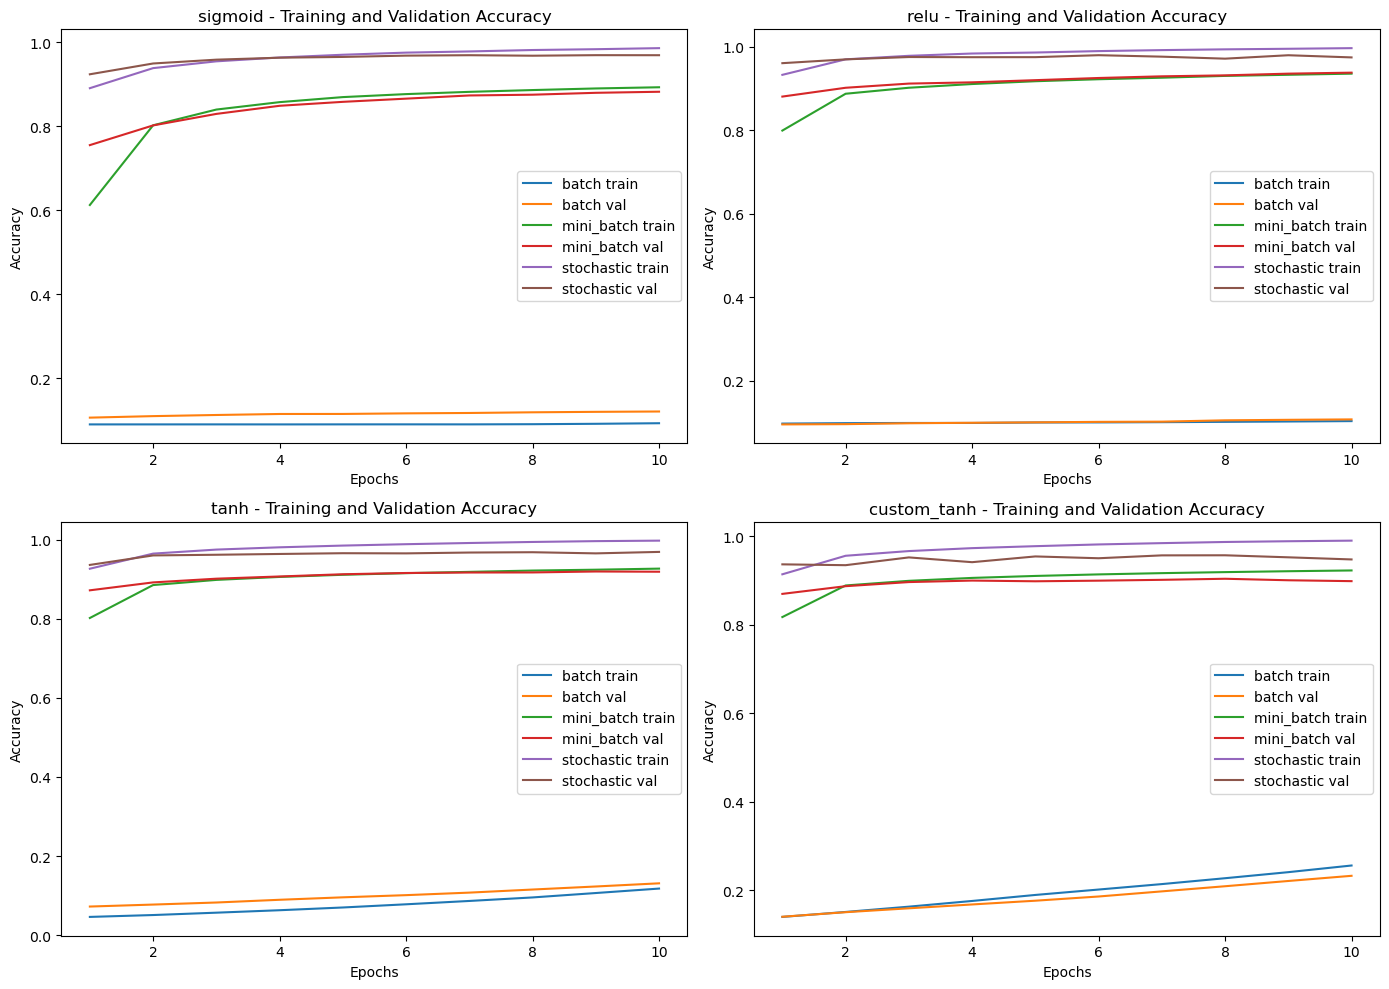

Activation Function: sigmoid
  batch training time: 4.679117679595947 seconds
  mini_batch training time: 19.934452295303345 seconds
  stochastic training time: 803.8975756168365 seconds
Activation Function: relu
  batch training time: 4.837385654449463 seconds
  mini_batch training time: 21.48952841758728 seconds
  stochastic training time: 783.5098161697388 seconds
Activation Function: tanh
  batch training time: 4.982241153717041 seconds
  mini_batch training time: 22.22477388381958 seconds
  stochastic training time: 843.9778249263763 seconds
Activation Function: custom_tanh
  batch training time: 5.03267765045166 seconds
  mini_batch training time: 21.38192653656006 seconds
  stochastic training time: 799.1956009864807 seconds


In [1]:
# Install TensorFlow
!pip install tensorflow

# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import numpy as np
import time
import matplotlib.pyplot as plt

# Load the MNIST dataset 
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a custom activation function]
def custom_tanh(x):
    a = 1.71
    b = 2/3
    return a * tf.keras.activations.tanh(b * x)

# Dictionary mapping activation function names to actual functions
activations = {
    'sigmoid': 'sigmoid',
    'relu': 'relu',
    'tanh': 'tanh',
    'custom_tanh': custom_tanh
}

# Function to create a model with a given activation function
def create_model(activation):
    model = Sequential([
        Flatten(input_shape=(28, 28)), 
        Dense(128, activation=activation),  
        Dense(10, activation='softmax')  
    ])
    return model

# Function to train the model using a given optimizer and batch size and calculate the training time for each optimizer
def train_model(model, optimizer, batch_size, epochs=10):
    model.compile(optimizer=optimizer,  loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
    start_time = time.time()  
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2) 
    end_time = time.time() 
    training_time = end_time - start_time 
    return history, training_time

# Dictionary mapping gradient descent methods to their batch sizes
batch_sizes = {'batch': len(X_train), 'mini_batch': 64,'stochastic': 1}
results = {}
# Loop over each activation function
for activation_name, activation_function in activations.items():
    print(f"Training with {activation_name} activation function...")
    method_results = {}
    # Loop over each gradient descent method
    for method, batch_size in batch_sizes.items():
        print(f"  Method: {method} gradient descent")
        model = create_model(activation_function)  
        optimizer = SGD(learning_rate=0.01)  
        history, training_time = train_model(model, optimizer, batch_size)  
        method_results[method] = {'history': history, 'training_time': training_time}  
    results[activation_name] = method_results 

# Plot training and validation accuracy for each activation function and gradient descent method
epochs = range(1, 11)
plt.figure(figsize=(14, 10))
for i, activation_name in enumerate(activations.keys()):
    plt.subplot(2, 2, i+1)
    for method in batch_sizes.keys():
        plt.plot(epochs, results[activation_name][method]['history'].history['accuracy'], label=f'{method} train')
        plt.plot(epochs, results[activation_name][method]['history'].history['val_accuracy'], label=f'{method} val')
    plt.title(f'{activation_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()  
plt.show()

# Plot training and validation loss for each activation function and gradient descent method
plt.figure(figsize=(14, 10))
for i, activation_name in enumerate(activations.keys()):
    plt.subplot(2, 2, i+1)
    for method in batch_sizes.keys():
        plt.plot(epochs, results[activation_name][method]['history'].history['loss'], label=f'{method} train')
        plt.plot(epochs, results[activation_name][method]['history'].history['val_loss'], label=f'{method} val')
    plt.title(f'{activation_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.tight_layout() 
plt.show()

# Print the training time for each activation function and gradient descent method
for activation_name, method_results in results.items():
    print(f"Activation Function: {activation_name}")
    for method, result in method_results.items():
        print(f"  {method} training time: {result['training_time']} seconds")

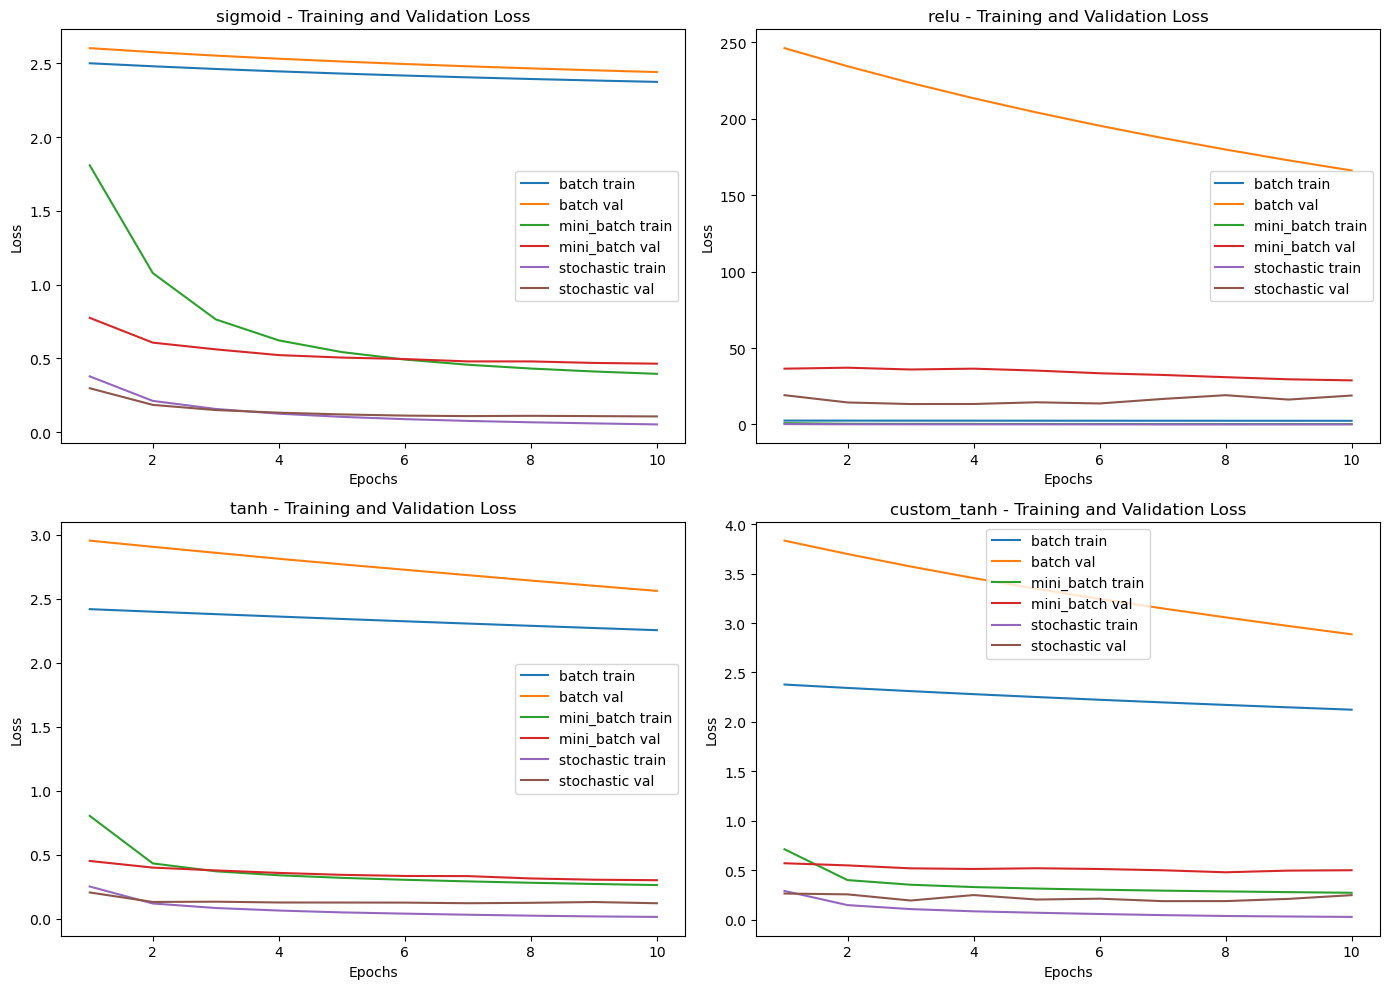